In [3]:
import pandas as pd

In [4]:
idx = pd.IndexSlice
df = pd.read_parquet('Data/test.parquet')

In [5]:
df['KNSL']

,Adj Close,Volume,norm_annual_return,norm_biannual_return,norm_daily_return,norm_monthly_return,norm_quarterly_return,target
Date,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-22,276.450012,121000.0,0.516301,0.616958,-0.505230,-0.778046,0.515636,-0.003013
2022-12-23,273.799988,95900.0,0.461607,0.622923,-0.318846,-0.729864,0.427950,-0.001435
2022-12-27,272.570007,100000.0,0.375381,0.644158,-0.151891,-0.914438,0.472029,-0.012867


In [4]:
df.count()[df.count() < 1000]

ACI     634
AGL     433
ALC     941
ALGM    547
AVTR    914
       ... 
XP      770
XPEV    591
YMM     385
ZI      650
ZM      934
Length: 76, dtype: int64

In [6]:
df2 = pd.read_parquet('Data/data.parquet')['AAPL']['Adj Close'].pct_change()['2003-01-02':].shift(-1)
df2.head()

Date
2003-01-02    0.006754
2003-01-03    0.000000
2003-01-06   -0.003352
2003-01-07   -0.020205
2003-01-08    0.008937
Name: Adj Close, dtype: float64

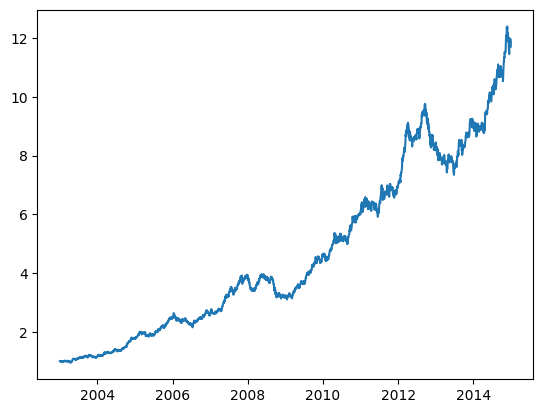

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumprod(df['AAPL'] + 1))

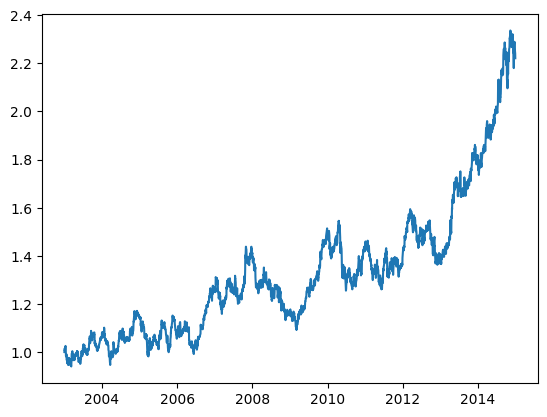

In [6]:
plt.plot(np.cumprod(df['MSFT'] + 1))

In [14]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [11]:
counts = pd.read_csv('Data/counts.csv', index_col=0).astype(int)
counts.head()

,0
A,5287
AA,5287
AAL,4346
AAP,5287
AAPL,5287


In [12]:
counts[(counts == 5287).values]

,0
A,5287
AA,5287
AAP,5287
AAPL,5287
ABB,5287
...,...
XOM,5287
XRAY,5287
YUM,5287
ZBH,5287


In [ ]:
counts == 5034

In [ ]:
from embedding_trainer import *

In [ ]:
idx = pd.IndexSlice
DATA = pd.read_parquet('Data/train.parquet').astype(np.float32).loc[:, idx[:, 'target']][-966:]
DATA = (DATA - np.mean(DATA, axis=0)) / np.std(DATA, axis=0)

In [ ]:
encoder = VAE.load_from_checkpoint('lightning_logs/version_35/checkpoints/epoch=18-step=1140.ckpt', input_dim=966, a2v_dim=9).encoder
encoder.eval()

In [ ]:
embeddings = encoder(torch.tensor(DATA.T.values)).detach().numpy()

In [ ]:
embeddings = pd.DataFrame(embeddings, index=DATA.columns)

In [ ]:
embeddings.head()

In [ ]:
embeddings.columns = embeddings.columns.astype(str)

In [ ]:
embeddings.to_parquet('Pre-trained Embeddings/v1.parquet')